# Tutorial 2

## Acoustic Signal Analysis with Python

 ** This notebook was developed by Julien Rapet **
 
 Let's create an artificial signal composed of a cosinusoidal signal  with $F_1 = 10\,$Hz and a sinusoidal signal with $F_2 =60\,$Hz.

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import numpy as np #array functions
import scipy.fftpack # Fourier transform
from matplotlib import rcParams
import scipy.io
import pyaudio
import wave #for loading audio files

#functionn to read int16 wav file
def readwav(fname):
    spf = wave.open(fname,'r')
    #Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    time = np.linspace(0., float(signal.size)/spf.getframerate(), signal.size)
    return time, signal

#function to play audio
def play(sig,sr=20000):     # Open stream with correct settings
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32,
                             channels=2,
                             rate=sr,
                             output=True,
                             output_device_index=1
                             )
    # Assuming you have a numpy array called samples
    data = sig.astype(np.float32).tostring()
    stream.write(data)
    stream.stop_stream()
    stream.close()
    p.terminate()
    
#nice plots    
rcParams['figure.figsize'] = (8, 6)
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 1.5

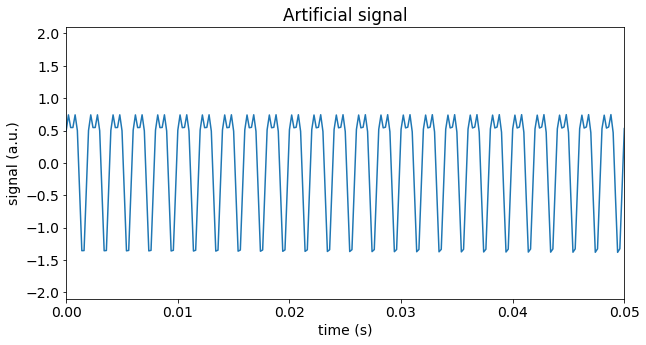

In [176]:
L = 1. # length signal in seconds
F = 5000  # Sampling frequency 
N = int(L*F) # number of samples

# Generate the signal
f1 = 1000.
f2 = 500.
t = np.linspace(0, L, N)


Sigcos = 0.5*np.cos(2.*np.pi*f1*t)
Sigsin = np.sin(2.*np.pi*f2*t)

Sig = Sigsin + Sigcos;

# Plot the signal
plt.figure(figsize=(10,5))
plt.plot(t,Sig);
plt.title("Artificial signal")
plt.xlabel("time (s)")
plt.ylabel("signal (a.u.)");
plt.ylim(-2.1,2.1);
plt.xlim(0,0.05)
play(Sig,F)

## We calculate the Fourier transform of our signal.

I.E we convert the signal from the time domain to its representation in the frequency domain. We use a special fourier transform algorithm named Fast Fourier Transform, or short FFT.

https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft

#### Nyquist–Shannon sampling theorem:

To signal containing frequencies of $F_{max}\,$Hz must be sampled at least with with a frequency $F_s = 2 F_{max}$



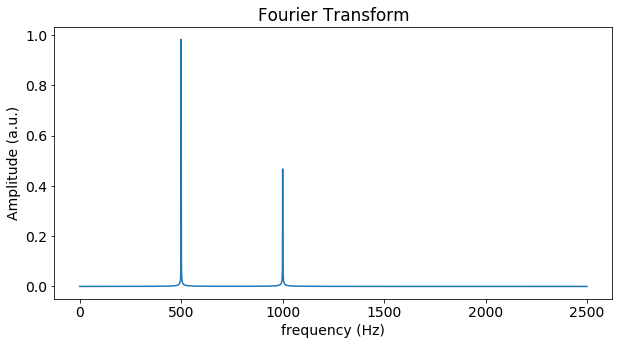

In [177]:
Sigf = np.fft.fft(Sig) # Fast Fourier Transform of the signal

xf = np.linspace(0.0, F/2., int(N/2.)) # frequency array as x axis (0 to F/2 with N/2 points due to symmetry 

plt.figure(figsize=(10,5))
plt.plot(xf, 2.0/N * np.abs(Sigf[:N//2]));

plt.title("Fourier Transform")
plt.xlabel("frequency (Hz)")
plt.ylabel("Amplitude (a.u.)");

We find two peaks, namely at $F_1$ and $F_2$, please check!

### A noisy signal

Our signal can be obscured by adding some noise. Let's see what the FFT reveals of this noisy signal and calculate the FFT.

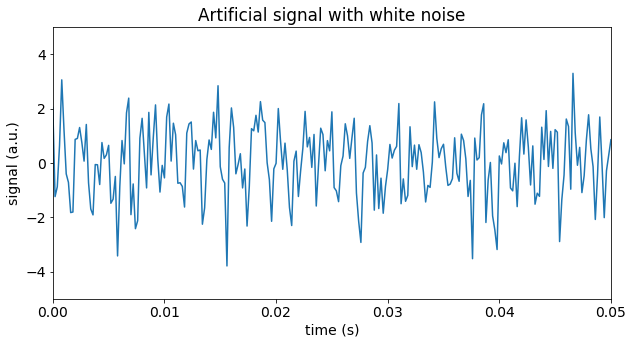

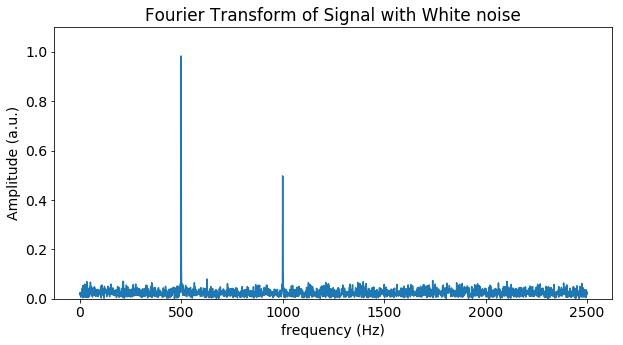

In [180]:
mean = 0 # White noise mean
std = 1 # White noise standard deviation
N_WN = N # number of points 
WN = np.random.normal(mean, std, size=N_WN)

Sig_WN = Sig + WN

plt.figure(figsize=(10,5))
plt.plot(t,Sig_WN);
plt.title("Artificial signal with white noise")
plt.xlabel("time (s)")
plt.ylabel("signal (a.u.)");
plt.xlim(0,0.05)
plt.ylim(-5.,5.);

Sigf_WN = np.fft.fft(Sig_WN) # Fast Fourier Transform of the signal
xf = np.linspace(0.0, F/2., int(N/2.)) # frequency array as x axis

plt.figure(figsize=(10,5))
plt.plot(xf, 2.0/N * np.abs(Sigf_WN[:N//2]));

#plt.xlim(0,100);
plt.ylim(0,1.1);
plt.title("Fourier Transform of Signal with White noise")
plt.xlabel("frequency (Hz)")
plt.ylabel("Amplitude (a.u.)");
play(Sig_WN,F)

### Some interesting functions 

Maximum, minimum and mean of time series.

## Spectrogram 

Documentation to the [spectrogram function](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram):

```
Pxx, freqs, bins, im = plt.specgram(x, NFFT=None, Fs=None, window=None, noverlap=None)

Pxx = columns are the periodograms of successive segments

freqs = The frequencies corresponding to the rows in spectrum

bins = The times corresponding to midpoints of segments

NFFT = size of windows / number of data points used in each block for the FFT, A power 2 is most efficient

Fs = sample frequency 

window = Type of window use 

noverlap = The number of points of overlap between blocks, common value is NFFT/2
```


You have to try yourself to find which parameters suit the best your experiment. but remember; the larger the window size, the better frequency resolution, but the time localization is poor. Similarly, the smaller the window size, the better localization but the frequency resolution is poor. 
 
The function ```specgram``` actually plots $10 \cdot \log_{10}(Pxx)$.


Here we study the time dependent frequency of a chirped-signal.

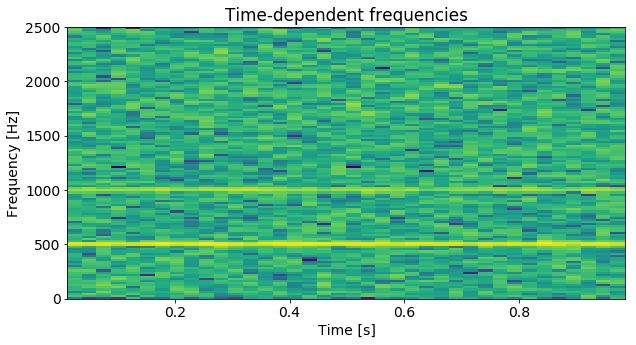

In [185]:
from scipy.signal import chirp
fs = 5e3
N = 5000
time = np.arange(N) / fs

x = chirp(time, f0=4e3, f1=1e3, t1=time[-1], method='log')

plt.figure(figsize=(10,5))
Pxx0, freqs0, bins0, im0 = plt.specgram(Sig_WN, Fs = fs)
plt.title("Time-dependent frequencies")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]');
#play(x,int(fs))

## Power Spectral Density 



The function ```plt.psd()``` plots $10\cdot \log_{10}(Pxx)$, [see](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.psd).

```
It describes how the power of a signal is distributed over the frequencies

Pxx, freqs = plt.psd(Sig_WN, NFFT=NFFT1, Fs=F, noverlap=NFFT1/2.)

Pxx = The values for the power spectrum $P_{xx}$ before scaling (real valued)

freqs = The frequencies corresponding to the elements in Pxx

NFFT = number of data points used in each block for the FFT, A power 2 is most efficient

Fs = sample frequency 

window = Type of window use 

noverlap = The number of points of overlap between blocks, common value is NFFT/2
```

You have to try yourself to find which parameters suit the best your experiment. but remember; the larger the window size, the better frequency resolution, but the time localization is poor. Similarly, the smaller the window size, the better localization but the frequency resolution is poor. 
 


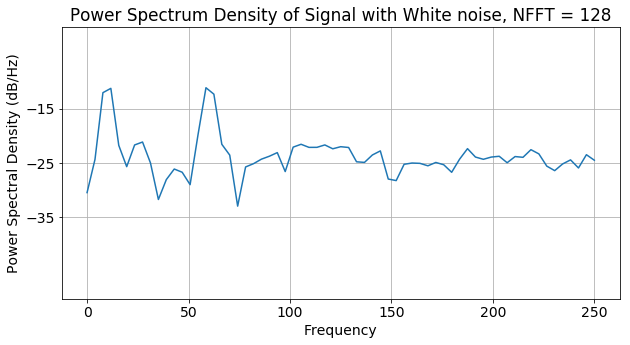

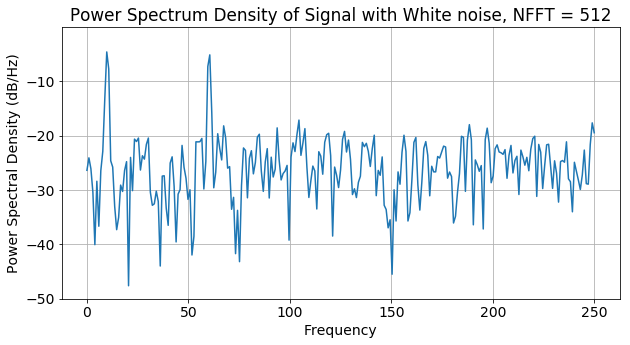

In [20]:
NFFT1 = 128
NFFT2 = 512

plt.figure(figsize=(10,5))
Pxx3, freqs3 = plt.psd(Sig_WN, NFFT=NFFT1, Fs=F, noverlap=NFFT1/2.)
plt.title("Power Spectrum Density of Signal with White noise, NFFT = 128")
#plt.xlim(0,500)
plt.ylim(-50,0)

plt.figure(figsize=(10,5))
Pxx4, freqs4 = plt.psd(Sig_WN, NFFT=NFFT2, Fs=F, noverlap=NFFT2/2.)
plt.title("Power Spectrum Density of Signal with White noise, NFFT = 512");
#plt.xlim(0,500);
plt.ylim(-50,0);

## Auto-correlation


Let's create two sinusoidal signals of the same frequency and add them some noise.

In a first time, we calculate the autocorrelation of signal 1, i.e the correlation between the signal and itself. The correlation measures the similarity between two signals as a function of the displacement of one relative to the other.

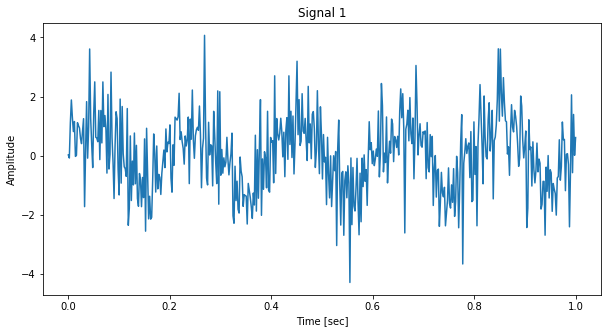

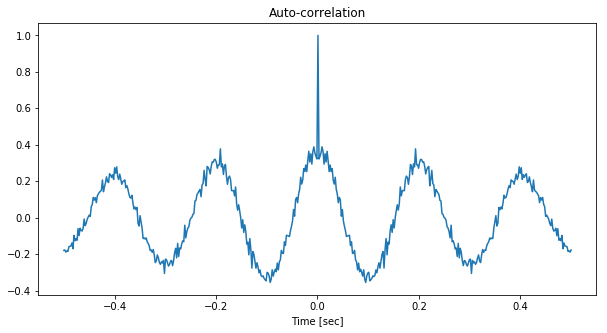

In [58]:
f = 5.
L = 1 #length signal
F = 500 # Sample frequency 
N = int(L*F) # number of samples
mean = 0 # White noise mean
std = 1 # White noise standard deviation
N_WN = N # number of points 

WN1 = np.random.normal(mean, std, size=N_WN)
WN2 = np.random.normal(mean, std, size=N_WN)

t = np.linspace(0, L, L*F)

sin1 = np.sin(2.*np.pi*f*t)
sin2 = np.sin(2.*np.pi*f*t+np.pi)

Sin_N1 = sin1 + WN1
Sin_N2 = sin2 + WN2

norm = np.sum(Sin_N1**2)
acor = np.correlate(Sin_N1, Sin_N1, "same")/norm

plt.figure(figsize=(10,5))
plt.plot(t,Sin_N1)
plt.title("Signal 1")
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]');


plt.figure(figsize=(10,5))
t2 = np.linspace(-L/2., L/2., L*F) # we generaly only look at the right side of the signal 
plt.plot (t2,acor)
plt.title("Auto-correlation")
plt.xlabel('Time [sec]');


## Cross-correlation


We now look at the correlation between signal 1 and signal 2, i.e. the cross-correlation.

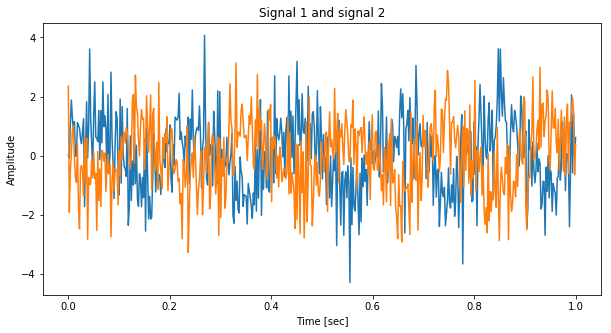

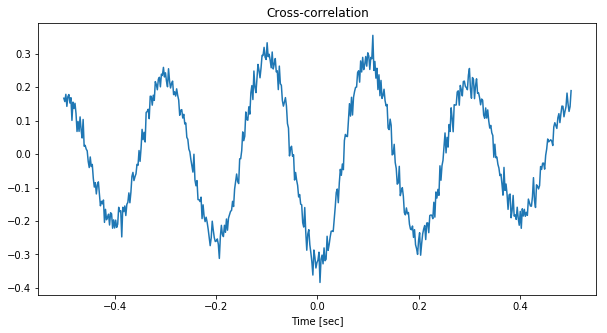

In [59]:
norm = np.sum(Sin_N1**2)
ccor = np.correlate(Sin_N1, Sin_N2, "same")/norm

plt.figure(figsize=(10,5))
plt.plot(t,Sin_N1,t,Sin_N2)
plt.title("Signal 1 and signal 2")
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]');


plt.figure(figsize=(10,5))
t2 = np.linspace(-L/2., L/2., L*F) # we generaly only look at the right side of the signal 
plt.plot (t2,ccor)
plt.title("Cross-correlation")
plt.xlabel('Time [sec]');

# Now it's your turn 

1- Load the files Signal1 and Signal 2 using the sample code bellow 

2- Plot both signal on a same figure

3- Calculate and plot for Signal1

        a. Fourier transform
        b. Spectrogram 
        c. Power spectral density 

4- Which Frequencies are present in the signal ?

5- Calculate and plot the auto-correlation for Signal1

6- Calculate and plot the cross-correlation for Signal1 and Signal2

7- According to the previous answer, can you guess how Signal1 was created ? 

/Users/cdohl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/cdohl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


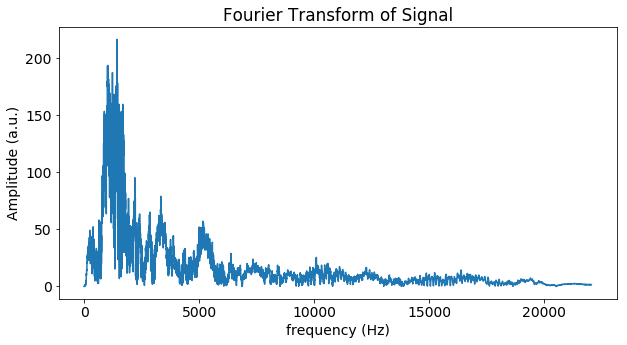

In [223]:
# Sample code 

from numpy import genfromtxt

#x1 = genfromtxt('s2.csv', delimiter=',')
#S1 = x1[:,1]
#time = x1[:,0]
time,S1=readwav('s2_wav.wav')
F=int(1./(time[1]-time[0]))
N=len(S1)
S1f = np.fft.fft(S1) # Fast Fourier Transform of the signal

xf = np.linspace(0.0, F/2., int(N/2.)) 

plt.figure(figsize=(10,5))
plt.plot(xf, 2.0/N * np.abs(S1f[0:N/2]));

#plt.ylim(0,1.1);
plt.title("Fourier Transform of Signal")
plt.xlabel("frequency (Hz)")
plt.ylabel("Amplitude (a.u.)");
#play(Sig_WN,F)
#plt.xlim(0,200)
#plt.ylim(0,.01)


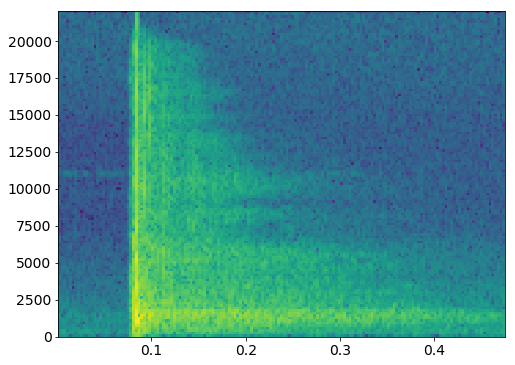

In [224]:
Pxx0, freqs0, bins0, im0 = plt.specgram(S1, Fs = F)

In [216]:
time

array([0.00000000e+00, 6.10370189e-05])

In [217]:
x1

array([[ 0.00000000e+00,  6.10370189e-05],
       [ 2.08341225e-02, -9.15555284e-05],
       [ 4.16682450e-02, -1.52592547e-04],
       ...,
       [ 3.98952612e+02, -9.15555284e-05],
       [ 3.98973446e+02,  0.00000000e+00],
       [ 3.98994280e+02,  0.00000000e+00]])